# Data Loading

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torchvision
import torchvision.transforms as transforms

In [3]:
#pip install ipywidgets

In [4]:
trainset = torchvision.datasets.CIFAR10(root = './data',
                                       train = True,
                                       download = True,
                                       transform = transforms.ToTensor() )

Files already downloaded and verified


In [5]:
classes =  ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [6]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True) 

In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next() 
 
print(images.shape)           
print(images[0].shape)
print(labels[0].item())       

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
8


Note here that in the first line torch.Size([4, 3, 32, 32])<br> 32,32 represents the size of img ie 32X32<br>3 corresponds to three channels ie 3 colors<br>4 corresponds to batch ie batch size of 4

# Visualize data

In [8]:
img = images[0]
print(type(img))

<class 'torch.Tensor'>


In [12]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

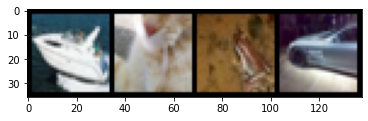

ship cat frog car


In [13]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]]for j in range(4)))        

# Single Convolutional Layer

In [14]:
import torch.nn as nn

In [15]:
class FirstCNN(nn.Module):
    def __init__(self):
        super(FirstCNN,self).__init__()    
        self.conv1=nn.Conv2d(3,16,3,padding=(1,1),stride=(2,2)) 
        
    def forward(self,x):  
        x = self.conv1(x)
        return x
    

In [16]:
net = FirstCNN()

In [17]:
print(net)

FirstCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
)


In [18]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

4 is the batch_size<br>16 is number of output channels<br>size of layer decreases to 16X16 due to convolutional operation

In [19]:
for param in net.parameters():
    print(param.shape)        

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [20]:
#plotting the output of convolution, taking the first channel
out1 = out[0, 0, :, :].detach().numpy()  
print(out1.shape)

(16, 16)


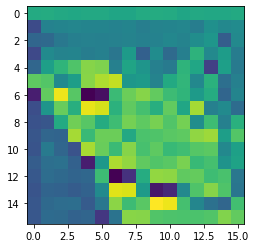

In [21]:
plt.imshow(out1)
plt.show()

# Deep CNN

In [22]:
class FirstCNN_v2(nn.Module):
    def __init__(self):
        super(FirstCNN_v2,self).__init__()
        self.model = nn.Sequential(nn.Conv2d(3, 8, 3),   
                                   nn.Conv2d(8, 16, 3) 
                                  )
            
    def forward(self,x):
        x = self.model(x)
        return x
        

(N, 3, 32, 32) -> (N, 8, 30, 30)<br>
(N, 8, 30, 30) -> (N, 16, 28, 28)

In [23]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

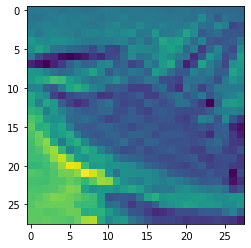

In [24]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [25]:
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         
            nn.AvgPool2d(kernel_size = 2, stride=2),  
            nn.Conv2d(6, 16, 5),        
            nn.AvgPool2d(2, stride=2) 
        )                  
        
    def forward(self, x):
        x = self.model(x)
        return x


In [26]:

net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

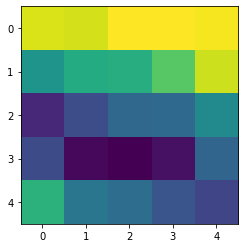

In [27]:

plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

# To Build a LeNet network

In [28]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.cnn_model = nn.Sequential( nn.Conv2d(3, 6, kernel_size = 5),         
                                        nn.Tanh(),
                                        nn.AvgPool2d(2, stride = 2),             
                                        nn.Conv2d(6, 16, kernel_size = 5),       
                                        nn.Tanh(),
                                        nn.AvgPool2d(2, stride = 2)               
                                      )
        self.fc_model = nn.Sequential(nn.Linear(400, 120),      
                                      nn.Tanh(),
                                      nn.Linear(120, 84), 
                                      nn.Tanh(),
                                      nn.Linear(84, 10) 
                                      )
    
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)   
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [29]:

net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [30]:
print(out)  

tensor([[ 0.0117, -0.0582,  0.0381,  0.0211, -0.1249,  0.1096, -0.1053, -0.0196,
         -0.0905,  0.0483],
        [ 0.0069, -0.0569,  0.0622, -0.0018, -0.1351,  0.1035, -0.1043,  0.0062,
         -0.0835,  0.0421],
        [-0.0069, -0.0792,  0.0485,  0.0174, -0.1270,  0.0999, -0.1199,  0.0185,
         -0.0796,  0.0243],
        [-0.0105, -0.0645,  0.0448,  0.0286, -0.1183,  0.1151, -0.1089, -0.0068,
         -0.0706,  0.0173]], grad_fn=<AddmmBackward>)


In [31]:
max_values, pred_class = torch.max(out.data, 1)    #to take only max values
print(pred_class)

tensor([5, 5, 5, 5])


# Training LeNet 

In [32]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [33]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


# Using CPU

In [34]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return(100 * correct/total)

In [35]:
net = LeNet()

In [36]:
import torch.optim as optim

 
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters()) 

Epoch: 0/16, Test acc: 38.07, Train acc: 38.03
Epoch: 1/16, Test acc: 41.88, Train acc: 42.63
Epoch: 2/16, Test acc: 46.33, Train acc: 46.56
Epoch: 3/16, Test acc: 48.39, Train acc: 50.28
Epoch: 4/16, Test acc: 50.76, Train acc: 53.03
Epoch: 5/16, Test acc: 51.94, Train acc: 54.96
Epoch: 6/16, Test acc: 52.14, Train acc: 56.13
Epoch: 7/16, Test acc: 53.57, Train acc: 58.22
Epoch: 8/16, Test acc: 53.32, Train acc: 58.26
Epoch: 9/16, Test acc: 53.54, Train acc: 60.10
Epoch: 10/16, Test acc: 54.38, Train acc: 60.93
Epoch: 11/16, Test acc: 55.07, Train acc: 61.77
Epoch: 12/16, Test acc: 54.26, Train acc: 62.45
Epoch: 13/16, Test acc: 54.98, Train acc: 63.89
Epoch: 14/16, Test acc: 54.39, Train acc: 63.62
Epoch: 15/16, Test acc: 55.12, Train acc: 64.98


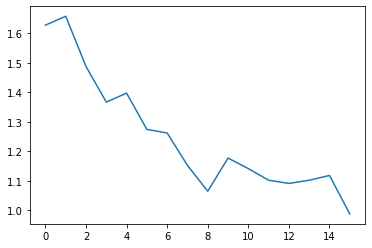

Wall time: 5min 49s


In [37]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data
        
        #forward pass
        opt.zero_grad()
        
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        
        #backward and optimize
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

# Using GPU

In [38]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [39]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [40]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters()) 

In [41]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))

Epoch: 0/16, Test acc: 37.55, Train acc: 37.24
Epoch: 1/16, Test acc: 41.78, Train acc: 42.03
Epoch: 2/16, Test acc: 46.03, Train acc: 47.12
Epoch: 3/16, Test acc: 48.38, Train acc: 49.85
Epoch: 4/16, Test acc: 49.88, Train acc: 52.16
Epoch: 5/16, Test acc: 52.40, Train acc: 54.82
Epoch: 6/16, Test acc: 52.00, Train acc: 56.02
Epoch: 7/16, Test acc: 53.28, Train acc: 57.69
Epoch: 8/16, Test acc: 54.05, Train acc: 58.59
Epoch: 9/16, Test acc: 54.13, Train acc: 59.94
Epoch: 10/16, Test acc: 54.65, Train acc: 61.31
Epoch: 11/16, Test acc: 55.01, Train acc: 62.58
Epoch: 12/16, Test acc: 54.99, Train acc: 63.33
Epoch: 13/16, Test acc: 55.32, Train acc: 63.64
Epoch: 14/16, Test acc: 54.99, Train acc: 64.10
Epoch: 15/16, Test acc: 55.15, Train acc: 65.63
Wall time: 3min 27s


# Basic Visualisation

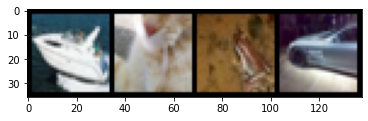

In [42]:
imshow(torchvision.utils.make_grid(images))

In [43]:
net = net.to('cpu')

In [44]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [45]:
out = net.cnn_model[0](images) #output of the first cnn layer
out.shape                       

torch.Size([4, 6, 28, 28])

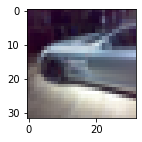

In [46]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

<ipython-input-47-a4ee68a8c1c9>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(3, 2, i+1)


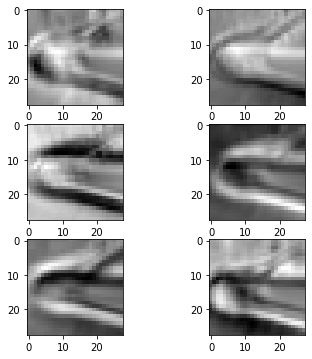

In [47]:
plt.figure(figsize = (6,6))       
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()

# LeNet using ReLU

In [48]:
class LeNet_ReLU(nn.Module):
    def __init__(self): 
        super(LeNet_ReLU, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.ReLU(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.ReLU(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [49]:
#Train using the GPU
net = LeNet_ReLU().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 38.73, Train acc: 38.57
Epoch: 1/16, Test acc: 43.53, Train acc: 44.09
Epoch: 2/16, Test acc: 46.89, Train acc: 47.52
Epoch: 3/16, Test acc: 46.28, Train acc: 47.12
Epoch: 4/16, Test acc: 50.05, Train acc: 50.88
Epoch: 5/16, Test acc: 50.75, Train acc: 52.45
Epoch: 6/16, Test acc: 53.23, Train acc: 55.12
Epoch: 7/16, Test acc: 53.56, Train acc: 56.24
Epoch: 8/16, Test acc: 54.13, Train acc: 56.55
Epoch: 9/16, Test acc: 55.34, Train acc: 58.72
Epoch: 10/16, Test acc: 55.49, Train acc: 59.75
Epoch: 11/16, Test acc: 56.55, Train acc: 60.63
Epoch: 12/16, Test acc: 57.36, Train acc: 61.64
Epoch: 13/16, Test acc: 56.84, Train acc: 61.61
Epoch: 14/16, Test acc: 57.67, Train acc: 62.69
Epoch: 15/16, Test acc: 57.33, Train acc: 63.16


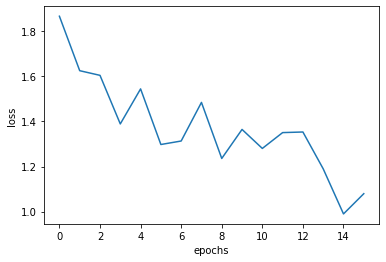

Wall time: 3min 37s


In [50]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("")
plt.show()

# Adding L2 Regularization

From the above loss plot we can see that it is overfitting the data, so we will apply L2 regularization using weight_decay in optim<br>We are using the LeNet_ReLU over here

In [51]:
optimizer_l2 = torch.optim.Adam(net.parameters(), lr=1e-4, weight_decay=1e-5)

Epoch: 0/50, Test acc: 59.66, Train acc: 67.48
Epoch: 1/50, Test acc: 59.80, Train acc: 67.21
Epoch: 2/50, Test acc: 59.84, Train acc: 67.48
Epoch: 3/50, Test acc: 59.70, Train acc: 67.41
Epoch: 4/50, Test acc: 59.48, Train acc: 67.73
Epoch: 5/50, Test acc: 59.76, Train acc: 67.78
Epoch: 6/50, Test acc: 59.72, Train acc: 67.91
Epoch: 7/50, Test acc: 59.98, Train acc: 67.89
Epoch: 8/50, Test acc: 59.84, Train acc: 67.82
Epoch: 9/50, Test acc: 60.08, Train acc: 68.14
Epoch: 10/50, Test acc: 60.07, Train acc: 68.19
Epoch: 11/50, Test acc: 60.34, Train acc: 68.18
Epoch: 12/50, Test acc: 59.94, Train acc: 68.21
Epoch: 13/50, Test acc: 60.08, Train acc: 68.52
Epoch: 14/50, Test acc: 59.79, Train acc: 68.60
Epoch: 15/50, Test acc: 59.82, Train acc: 68.63
Epoch: 16/50, Test acc: 60.11, Train acc: 68.59
Epoch: 17/50, Test acc: 59.98, Train acc: 68.64
Epoch: 18/50, Test acc: 60.03, Train acc: 68.64
Epoch: 19/50, Test acc: 60.16, Train acc: 68.99
Epoch: 20/50, Test acc: 60.27, Train acc: 69.10
Ep

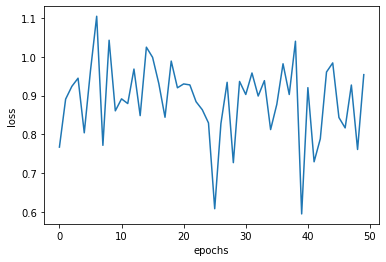

Wall time: 10min 45s


In [53]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 50

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):
      
        # get the inputs
        inputs, labels = data
        
        #move inputs to gpu
        inputs, labels = inputs.to(device), labels.to(device)
        
        # zero the parameter gradients
        optimizer_l2.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer_l2.step()
        
        #store loss value for loss plot
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("")
plt.show()